<a href="https://colab.research.google.com/github/kwanda2426/Classification-Hackathon/blob/main/Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HEART FAILURE PREDICTIONS**

<img src="https://images.ctfassets.net/yixw23k2v6vo/6BezXYKnMqcG4LSEcWyXlt/b490656e99f34bc18999f3563470eae6/iStock-1156928054.jpg?fm=webp&fit=thumb&q=65&w=864&h=576" >

**By:**

**Kwanda Mazibuko and Nokulunga Twala** 





## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering And Selection](#features)
6. [Model Building And Evaluation](#model)
7. [Model Hyperparameter Tuning](#tuning)
8. [Conclusion](#conclusion)
9. [References](#references)

<a id="intro"></a>
# 1. **Introduction**

Heart diseases are often used in exchange for cardiovascular diseases. These kinds of diseases mainly refer to the conditions of blocked or narrowed blood vessels, resulting in a stroke, chest pain or angina, and heart attack.

Other kinds of heart conditions, such as those affecting the rhythm, valve, or muscle of the heart, are other types of heart diseases. On the other hand, machine learning is crucial for determining whether anyone has suffered from heart disease. In either case, if these are predicted ahead of time, doctors would have a much easier time gaining crucial information for treating and diagnosing patients. Heart disease is mainly an incorrect symptom of coronary artery disease. It is also known as a cardiac disease; therefore, it is not with cardiovascular disease, which is any blood vessel disease.

**Context**


Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Symptoms of heart attacks and strokes**

Often, there are no symptoms of the underlying disease of the blood vessels. A heart attack or stroke may be the first sign of underlying disease. Symptoms of a heart attack include:

- pain or discomfort in the centre of the chest; and/or
- pain or discomfort in the arms, the left shoulder, elbows, jaw, or back.

**Problem Statement**

Day by day the cases of heart diseases are increasing at a rapid rate and it’s very Important
and concerning to predict any such diseases beforehand. This diagnosis is a difficult task for instances it should
be performed precisely and efficiently. This project mainly focuses on which patient is more
likely to have a heart disease based on various medical attributes.

**Objective / Aim**

The objective of this project is to check whether the patient is likely to be diagnosed with any
cardiovascular heart diseases based on their medical attributes such as gender, age and chest pain. 

<a id="data"></a>
# 2. **Data Collection**

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd

import requests
import io
#
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

# datetime
import datetime

# Libraries for data preparation and model building
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import boxcox, zscore
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

# Deep Learning

# for operating system
import os

#tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

# saving my model
import pickle

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://github.com/Nokulunga77/Heart-Failure-kaggle/blob/main/heart.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

**Attribute Information**

1. Age: age of the patient [years]

2. Sex: sex of the patient [M: Male, F: Female]

3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4. RestingBP: resting blood pressure [mm Hg]

5. Cholesterol: serum cholesterol [mm/dl]

6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10. Oldpeak: oldpeak = ST [Numeric value measured in depression]

11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12. HeartDisease: output class [1: heart disease, 0: Normal]

<a id="cleaning"></a>
## 3. **Data Preprocessing**

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
df.Cholesterol.describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

<a id="EDA"></a>
## 4. **Exploratory Data Analysis**

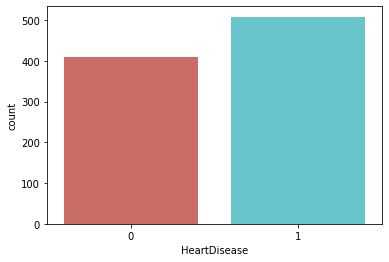

In [ ]:
sns.countplot(x = 'HeartDisease', data = df, palette="hls" )

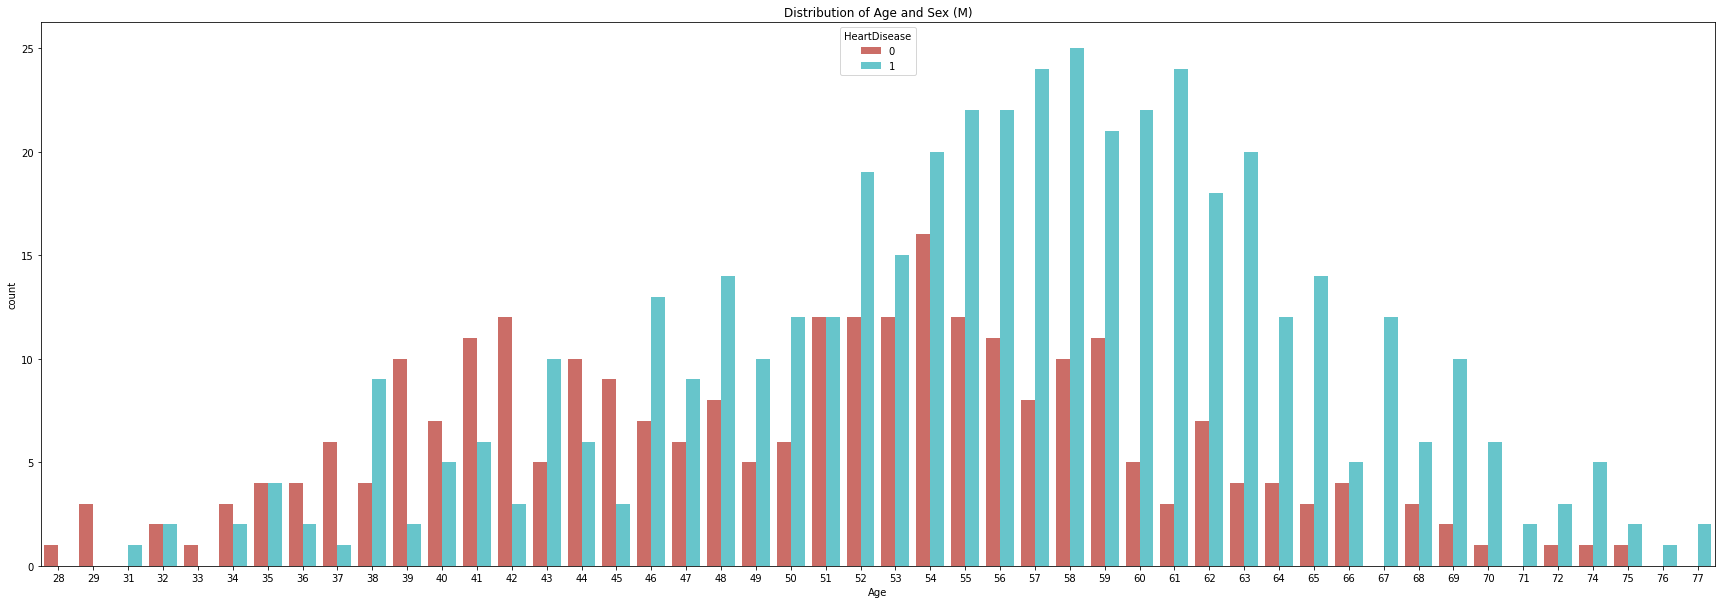

In [ ]:
from matplotlib import rcParams
sns.countplot(x = 'Age', data = df[df['Sex'] == 'M'], palette="hls", hue = 'HeartDisease' )
rcParams['figure.figsize'] = 30,10
plt.title("Distribution of Age and Sex (M)");

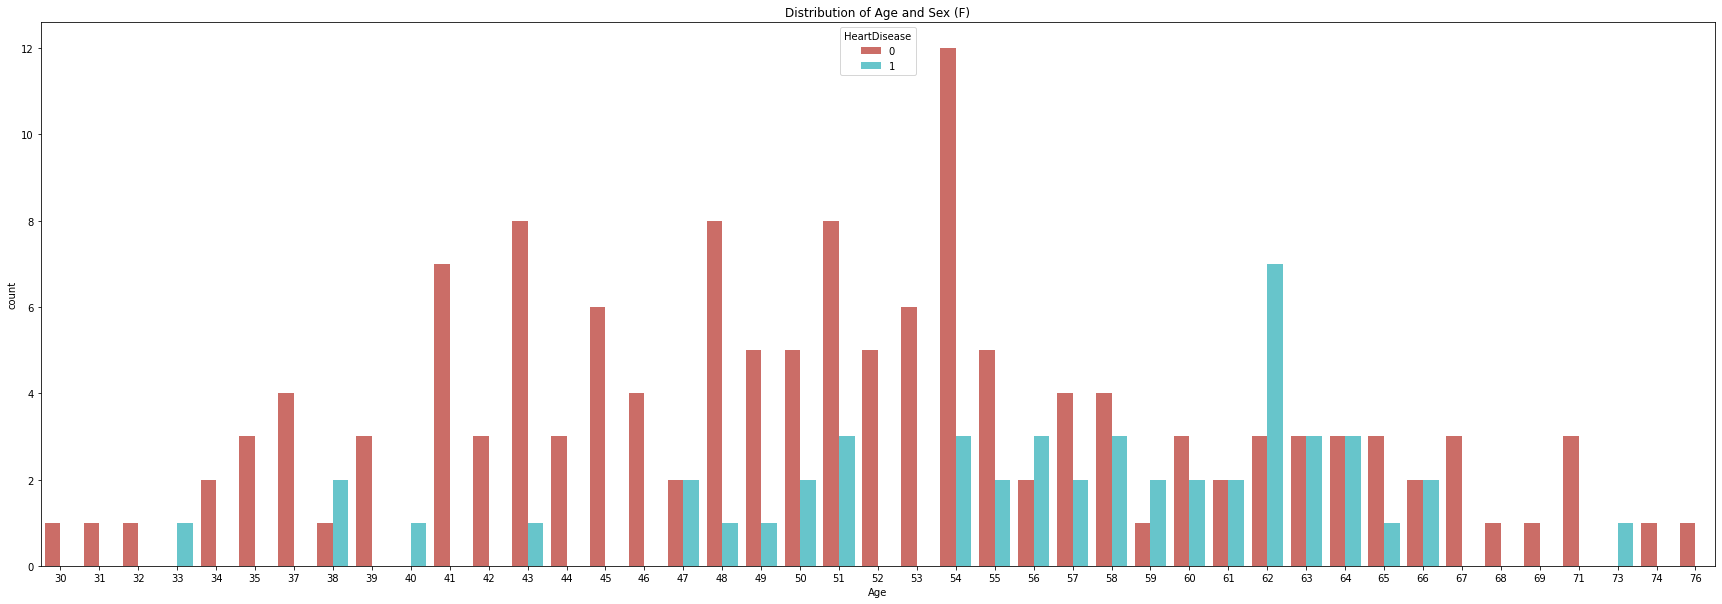

In [ ]:
sns.countplot(x = 'Age', data = df[df['Sex'] == 'F'] , palette="hls", hue = 'HeartDisease')
rcParams['figure.figsize'] = 30,10
plt.title("Distribution of Age and Sex (F)");

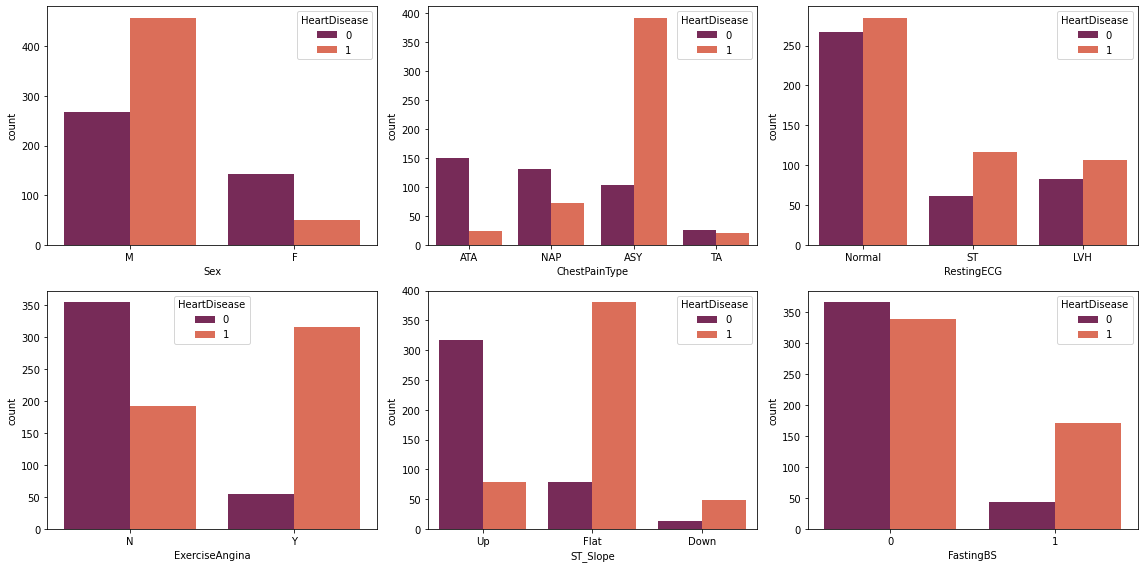

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

sns.countplot(x = 'Sex', data = df, hue = "HeartDisease", palette = "rocket", ax = ax[0,0])
sns.countplot(x = 'ChestPainType', data = df, hue = "HeartDisease", palette = "rocket", ax = ax[0,1])
sns.countplot(x = 'RestingECG', data = df, hue = "HeartDisease",palette = "rocket", ax = ax[0,2])

sns.countplot(x = 'ExerciseAngina', data = df, hue = "HeartDisease", palette = "rocket", ax = ax[1,0])
sns.countplot(x = 'ST_Slope', data = df, hue = "HeartDisease", palette = "rocket", ax = ax[1,1])
sns.countplot(x = 'FastingBS', data = df, hue = "HeartDisease", palette = "rocket", ax = ax[1,2])

fig.tight_layout()

<a id="features"></a>
## 5. **Feature engineering And Selection**

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

**Dealing With Zero Cholesterol Values**

There are rows where the Cholesterol is equal to zero. We replace the zero with the mean value of the age group.

In [31]:
df.groupby('Age').mean()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,,,,,,
28,130.000000,132.000000,0.000000,185.000000,0.000000,0.000000
29,130.000000,236.666667,0.000000,177.333333,0.000000,0.000000
30,170.000000,237.000000,0.000000,170.000000,0.000000,0.000000
31,110.000000,244.500000,0.000000,151.500000,0.750000,0.500000
32,110.600000,241.200000,0.200000,152.200000,0.140000,0.400000
33,110.000000,272.000000,0.000000,167.500000,0.500000,0.500000
34,124.142857,163.285714,0.142857,172.571429,0.128571,0.285714
35,126.272727,197.454545,0.090909,158.909091,0.372727,0.363636
36,123.666667,190.333333,0.166667,166.500000,0.833333,0.333333


In [16]:
# age mean of the features
mean_age_values = df.groupby('Age').mean()
df_filled = df.copy()

In [32]:
# looping through the df

for i in range(0, len(df_filled)):

  if df_filled.loc[i,'Cholesterol'] == float(0):

    age = df_filled.loc[i,'Age']

    df_filled.loc[i, 'Cholesterol'] = mean_age_values.loc[age,'Cholesterol']


### **Manual encoding**

Here we encode numerically according to the results observe in our EDA. If the feature appears to have more values of a certain class, that may indicate a strong influence for the class, hence we assign more or less weight, depending on how the feature affect the class.

In [ ]:
# copying the df
df_train_man = df.copy()

# creating encoding dict
Sex = {'M': 1, 'F': 0}
ChestPainType = {'ATA': 1, 'NAP': 2, 'ASY': 3, 'TA': 0}
RestingECG = {'Normal': 3, 'ST': 1.5, 'LVH': 1}
ExerciseAngina = {'N': 1, 'Y': 0}
ST_Slope = {'Down': 0, 'Flat': 2, 'Up': 1}

# Encoding data

df_train_man['Sex'] = df_train_man['Sex'].replace(Sex)
df_train_man['ChestPainType'] = df_train_man['ChestPainType'].replace(ChestPainType)
df_train_man['RestingECG'] = df_train_man['RestingECG'].replace(RestingECG)
df_train_man['ExerciseAngina'] = df_train_man['ExerciseAngina'].replace(ExerciseAngina)
df_train_man['ST_Slope'] = df_train_man['ST_Slope'].replace(ST_Slope)

### **Get Dummies encoding**

Dummies are any variables that are either one or zero for each observation. pd.get_dummies when applied to a column of categories where we have one category per observation will produce a new column (variable) for each unique categorical value. It will place a one in the column corresponding to the categorical value present for that observation. This is equivalent to one hot encoding.

In [ ]:
# training data
df_train_dummies = pd.get_dummies(df, drop_first = True)

<a id="model"></a>
## 6. **Model Building And Evaluation**

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

**Train Dataset**: Used to fit the machine learning model.
**Test Dataset**: Used to evaluate the fit machine learning model.

**Data Encoded using manual encoding**

In [ ]:
# X and y
X = df_train_man.drop(['HeartDisease'], axis = 1)

y = df_train_man['HeartDisease']

# splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Data Encoded using get_dummies**

In [ ]:
# X and y
X = df_train_dummies.drop(['HeartDisease'], axis = 1)

y = df_train_dummies['HeartDisease']

# splitting data for training and testing

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### **LogisticRegression**

The logistic model is a statistical model that models the probability of one event taking place by having the log-odds for the event be a linear combination of one or more independent variables. 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train model
clf = LogisticRegression()
clf.fit(X_train, y_train)

clf_d = LogisticRegression()
clf_d.fit(X_train_d, y_train_d)

LogisticRegression()

#### **GradientBoostingClassifier**

Gradient-boosted trees (GBTs) are a popular classification and regression method using ensembles of decision trees. A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# train model
GBC = GradientBoostingClassifier(n_estimators = 200, learning_rate = 1.0, max_depth = 5)
GBC.fit(X_train, y_train)

GBC_d = GradientBoostingClassifier(n_estimators = 200, learning_rate = 1.0, max_depth = 5)
GBC_d.fit(X_train_d, y_train_d)


GradientBoostingClassifier(learning_rate=1.0, max_depth=5, n_estimators=200)

#### **Random Forest Classifier**

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=100, max_depth=5,
                                     random_state=0, class_weight="balanced")

rfc_d = RandomForestClassifier(n_estimators=100, max_depth=5,
                                     random_state=0, class_weight="balanced")
#train the model 
rfc.fit(X_train, y_train)


rfc_d.fit(X_train_d, y_train_d)


RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=0)

#### **Support Vector Machine**

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane.

In [ ]:
from sklearn import svm

# Train model
SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVM_d = svm.SVC()
SVM_d.fit(X_train_d, y_train_d)

SVC()

## **Model Evaluation**

Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data and how well the chosen model will work in the future.

In [ ]:
# Dictionary of results
results_dict = {'Manual Encoding':
                    {
                        "GradientBoostingClassifier": accuracy_score(y_test, GBC.predict(X_test)),
                        "RandomForestClassifier": accuracy_score(y_test, rfc.predict(X_test)),
                        "SupportVectorMachine": accuracy_score(y_test, SVM.predict(X_test)),
                        "LogisticRegression": accuracy_score(y_test, clf.predict(X_test))
                        
                    },
                    'Get_Dummies Encoding':
                    {
                        "GradientBoostingClassifier": accuracy_score(y_test_d, GBC_d.predict(X_test_d)),
                        "RandomForestClassifier": accuracy_score(y_test_d, rfc_d.predict(X_test_d)),
                        "SupportVectorMachine": accuracy_score(y_test_d, SVM_d.predict(X_test_d)),
                        "LogisticRegression": accuracy_score(y_test_d, clf_d.predict(X_test_d))
                        
                    }

                }

# Create dataframe from dictionary
results = pd.DataFrame(results_dict)
results.head()

,Manual Encoding,Get_Dummies Encoding
GradientBoostingClassifier,0.847826,0.853261
RandomForestClassifier,0.885870,0.858696
SupportVectorMachine,0.684783,0.684783
LogisticRegression,0.842391,0.847826


<a id="evaluation"></a>
## 7. **Model Parameter Tuning**

<a id="conclusion"></a>
## 8. **Conclusion**

<a id="references"></a>
## 9. **References**